In [12]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [28]:
%run -i ./ownlib/PHT-Library.ipynb

In [25]:
ori_img = cv2.imread('./assets/maudy.png', 0)
ori_logo = cv2.imread('./assets/ecorp.png', 0)

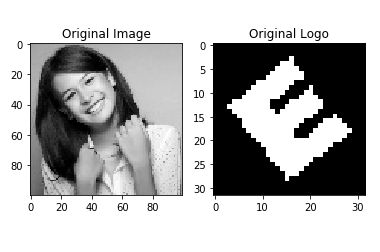

In [31]:
N = 100
G = 32
P = 40
T_STEP = int(P / 3) + 1
I_STEP = int(N / 6) + 1

# Preprocess Image
IMG = cv2.resize(ori_img, (N, N))

# Preprocess Logo
LOGO = cv2.resize(ori_logo, (G,G))
LOGO = (LOGO >= 128) * 1

# Show Image and Logo
imshow2(IMG, LOGO, 'Original Image', 'Original Logo')

Progress: [####################] 100.0%


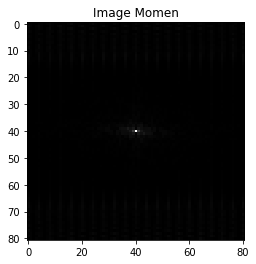

In [16]:
MOMEN = transformPHT(IMG, N, P)
imshow(MOMEN, 'Image Momen')

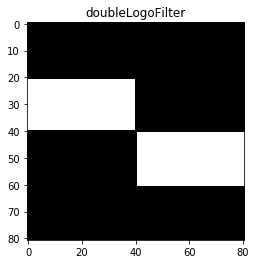

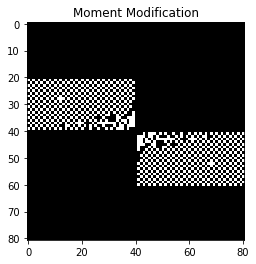

In [101]:
DELTA = 1

# 
matQ = np.floor(np.abs(MOMEN) / DELTA) % 2

# 
P2 = P * 2 + 1
doubleLogo = np.zeros((P2, P2))
# doubleLogo[P+5,P+5] = 1
# doubleLogo[P-5,P-5] = 1
for i, row in enumerate(doubleLogo):
    for j, val in enumerate(row):
        doubleLogo[i,j] = (i + j) % 2

# 
doubleLogoFilter = np.zeros((P2, P2))
doubleLogoFilter[0:P, 0:P] = 1
doubleLogoFilter[P+1:P2, P+1:P2] = 1
for i, row in enumerate(doubleLogoFilter):
    for j, val in enumerate(row):
#         if(i+j < P or i+j > 3 * P):
#             doubleLogoFilter[i,j] = 0
#         if(i+j >= 1.5 * P and i+j <= 2.5 * P):
#             doubleLogoFilter[i,j] = 0
        if(i <= P/2 or i > 3 * P / 2):
            doubleLogoFilter[i,j] = 0
        

# 
OMEGA = DELTA * ((doubleLogo != matQ)) / np.abs(MOMEN) * MOMEN
OMEGA = OMEGA * doubleLogoFilter

# 
imshow(doubleLogoFilter, 'doubleLogoFilter')
imshow(OMEGA, 'Moment Modification')

# matQ2 = np.floor(np.abs(MOMEN + OMEGA) / DELTA) % 2
# imshow(matQ2, 'Momen Binary Value Modified')

Progress: [####################] 100.0%


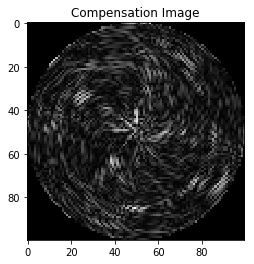

In [102]:
EPSILON = inversePHT(OMEGA, N, P)
imshow(EPSILON, 'Compensation Image')

Progress: [####################] 100.0%


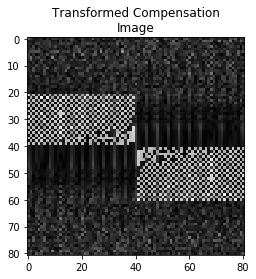

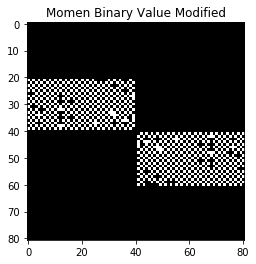

In [103]:
OMEGA2 = transformPHT(EPSILON, N, P)
imshow(OMEGA2, 'Transformed Compensation\nImage')

matQ3 = np.floor(np.abs(MOMEN + OMEGA2) / DELTA) % 2
imshow(matQ3 * doubleLogoFilter, 'Momen Binary Value Modified')

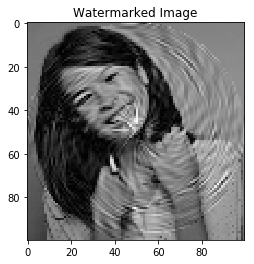

In [104]:
IMG_WATERMARKED = IMG + EPSILON
imshow(IMG_WATERMARKED, 'Watermarked Image')

Progress: [####################] 100.0%


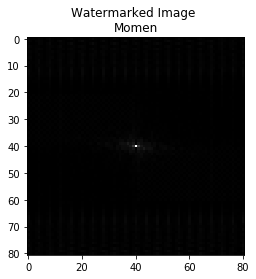

In [105]:
MOMEN_WATERMARKED = transformPHT(IMG_WATERMARKED, N, P)
imshow(MOMEN_WATERMARKED, 'Watermarked Image \nMomen')

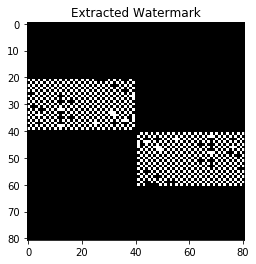

In [107]:
EXTRACTED_WATERMARK = np.floor(np.abs(MOMEN_WATERMARKED) / DELTA) % 2
imshow(EXTRACTED_WATERMARK * doubleLogoFilter, 'Extracted Watermark')